In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [2]:
normal_path = "C:/Users/vippa/OneDrive/Documents/AIML/AI Medical Diagnosis/Brain_stroke_dataset/Normal"

stroke_path = "C:/Users/vippa/OneDrive/Documents/AIML/AI Medical Diagnosis/Brain_stroke_dataset/Stroke"


In [3]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [4]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [5]:
import os
from PIL import Image
import numpy as np

normal_path = "C:/Users/vippa/OneDrive/Documents/AIML/AI Medical Diagnosis/Brain_stroke_dataset/Normal"

stroke_path = "C:/Users/vippa/OneDrive/Documents/AIML/AI Medical Diagnosis/Brain_stroke_dataset/Stroke"

data = []

normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

for img_file in normal_folder:
    image_path = os.path.join(normal_path, img_file)
    image = Image.open(image_path)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in stroke_folder:
    image_path = os.path.join(stroke_path, img_file)
    image = Image.open(image_path)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


In [6]:
len(data)

2501

In [7]:
data[0].shape

(224, 224, 3)

In [8]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [9]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [10]:
Target_label = normal_label + stroke_label

In [11]:
len(Target_label)

2501

In [12]:
x = np.array(data)
y = np.array(Target_label)

In [13]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


In [16]:
x_train_s = x_train/255
x_test_s = x_test/255 

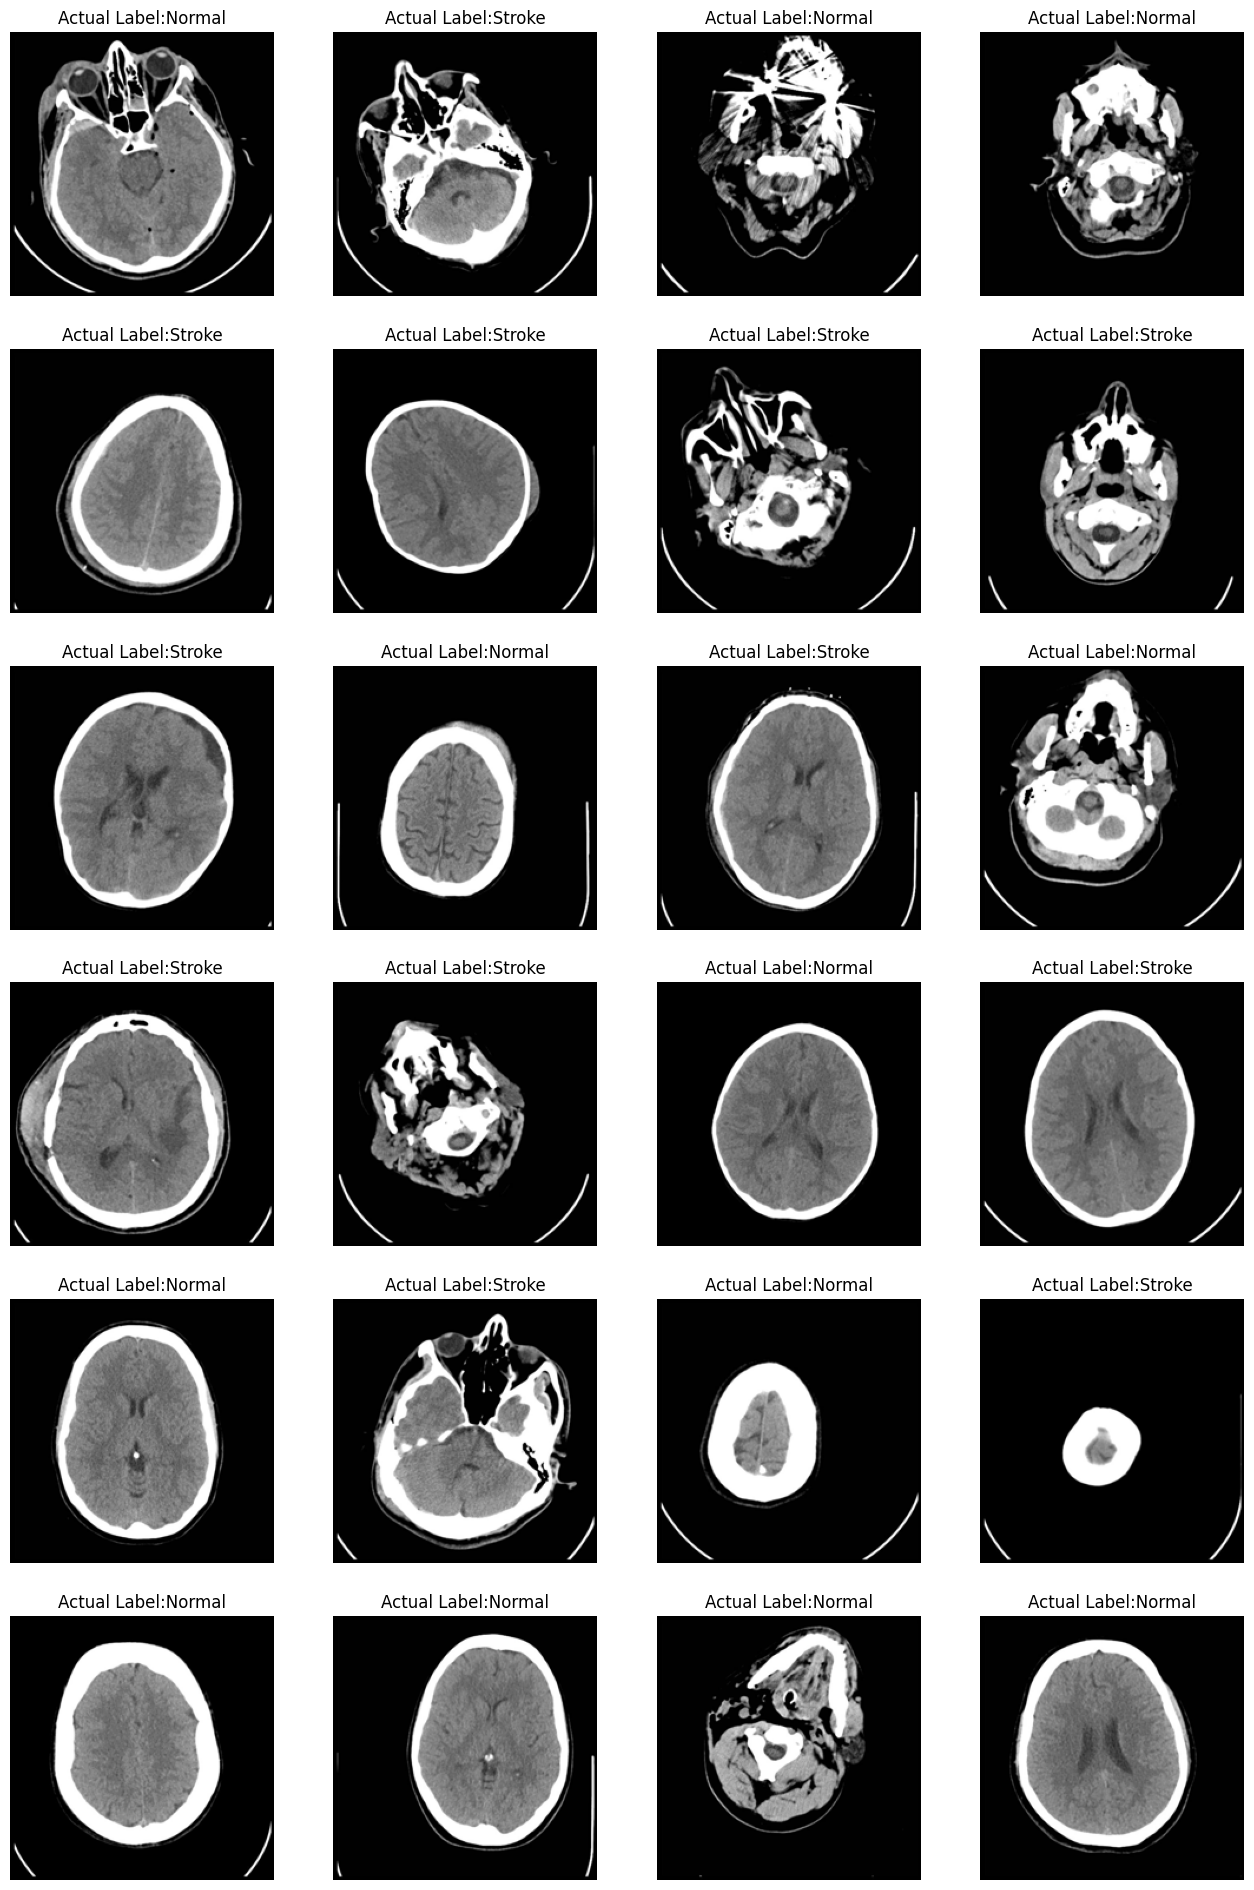

In [17]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, ResNet152, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 and ResNet-152
mobilenet_base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base_model = tf.keras.applications.ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [21]:
def build_classification_head(base_model):
    model = tf.keras.Sequential([
        base_model,
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

mobilenet_model = build_classification_head(mobilenet_base_model)
resnet_model = build_classification_head(resnet_base_model)

In [22]:
input_layer = Input(shape=(224, 224, 3))

mobilenet_output = mobilenet_model(input_layer)
resnet_output = resnet_model(input_layer)

In [23]:
combined = tf.keras.layers.concatenate([mobilenet_output, resnet_output])

In [24]:
x = Dense(32, activation='relu')(combined)
x = Dropout(0.2)(x)

In [25]:
output_layer = Dense(1, activation='sigmoid')(x)

Ensemble model

In [26]:
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

In [27]:
ensemble_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define and compile the model
model = Sequential([
    tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_s, y_train, batch_size=16, epochs=20, validation_data=(x_test_s, y_test))


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 590s 2s/step - accuracy: 0.5925 - loss: 1.3691 - val_accuracy: 0.5976 - val_loss: 0.6983
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.6839 - loss: 0.6101 - val_accuracy: 0.6135 - val_loss: 0.7957
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.6580 - loss: 1.2009 - val_accuracy: 0.6056 - val_loss: 1.0242
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.6523 - loss: 0.6327 - val_accuracy: 0.5976 - val_loss: 0.6849
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.6447 - loss: 0.5379 - val_accuracy: 0.5976 - val_loss: 0.6880
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.7051 - loss: 0.5150 - val_accuracy: 0.5976 - val_loss: 0.6901
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.7535 - loss: 0.4877 - val_accuracy: 0.5976 - val_loss: 0.6918
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.7778 - loss: 0.4993 - val_accu

In [29]:
import time
batch_size = 32
start_time = time.time()
loss, acc = ensemble_model.evaluate(x_test_s, y_test, batch_size=batch_size)
print("Loss on Test Data:", loss)
print("Accuracy on Test Data:", acc)
print("Evaluation time on Test Data:", time.time() - start_time, "seconds")


8/8 ━━━━━━━━━━━━━━━━━━━━ 179s 9s/step - accuracy: 0.5391 - loss: 0.6932
Loss on Test Data: 0.6917510628700256
Accuracy on Test Data: 0.5577689409255981
Evaluation time on Test Data: 183.1767349243164 seconds


In [30]:
y_pred_test = ensemble_model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 ━━━━━━━━━━━━━━━━━━━━ 185s 17s/step


In [31]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 1 0 1 0 1 1 1 1 0]
Predicted Label: [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]


In [32]:
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[115  35]
 [ 76  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.77      0.67       150
           1       0.42      0.25      0.31       101

    accuracy                           0.56       251
   macro avg       0.51      0.51      0.49       251
weighted avg       0.53      0.56      0.53       251



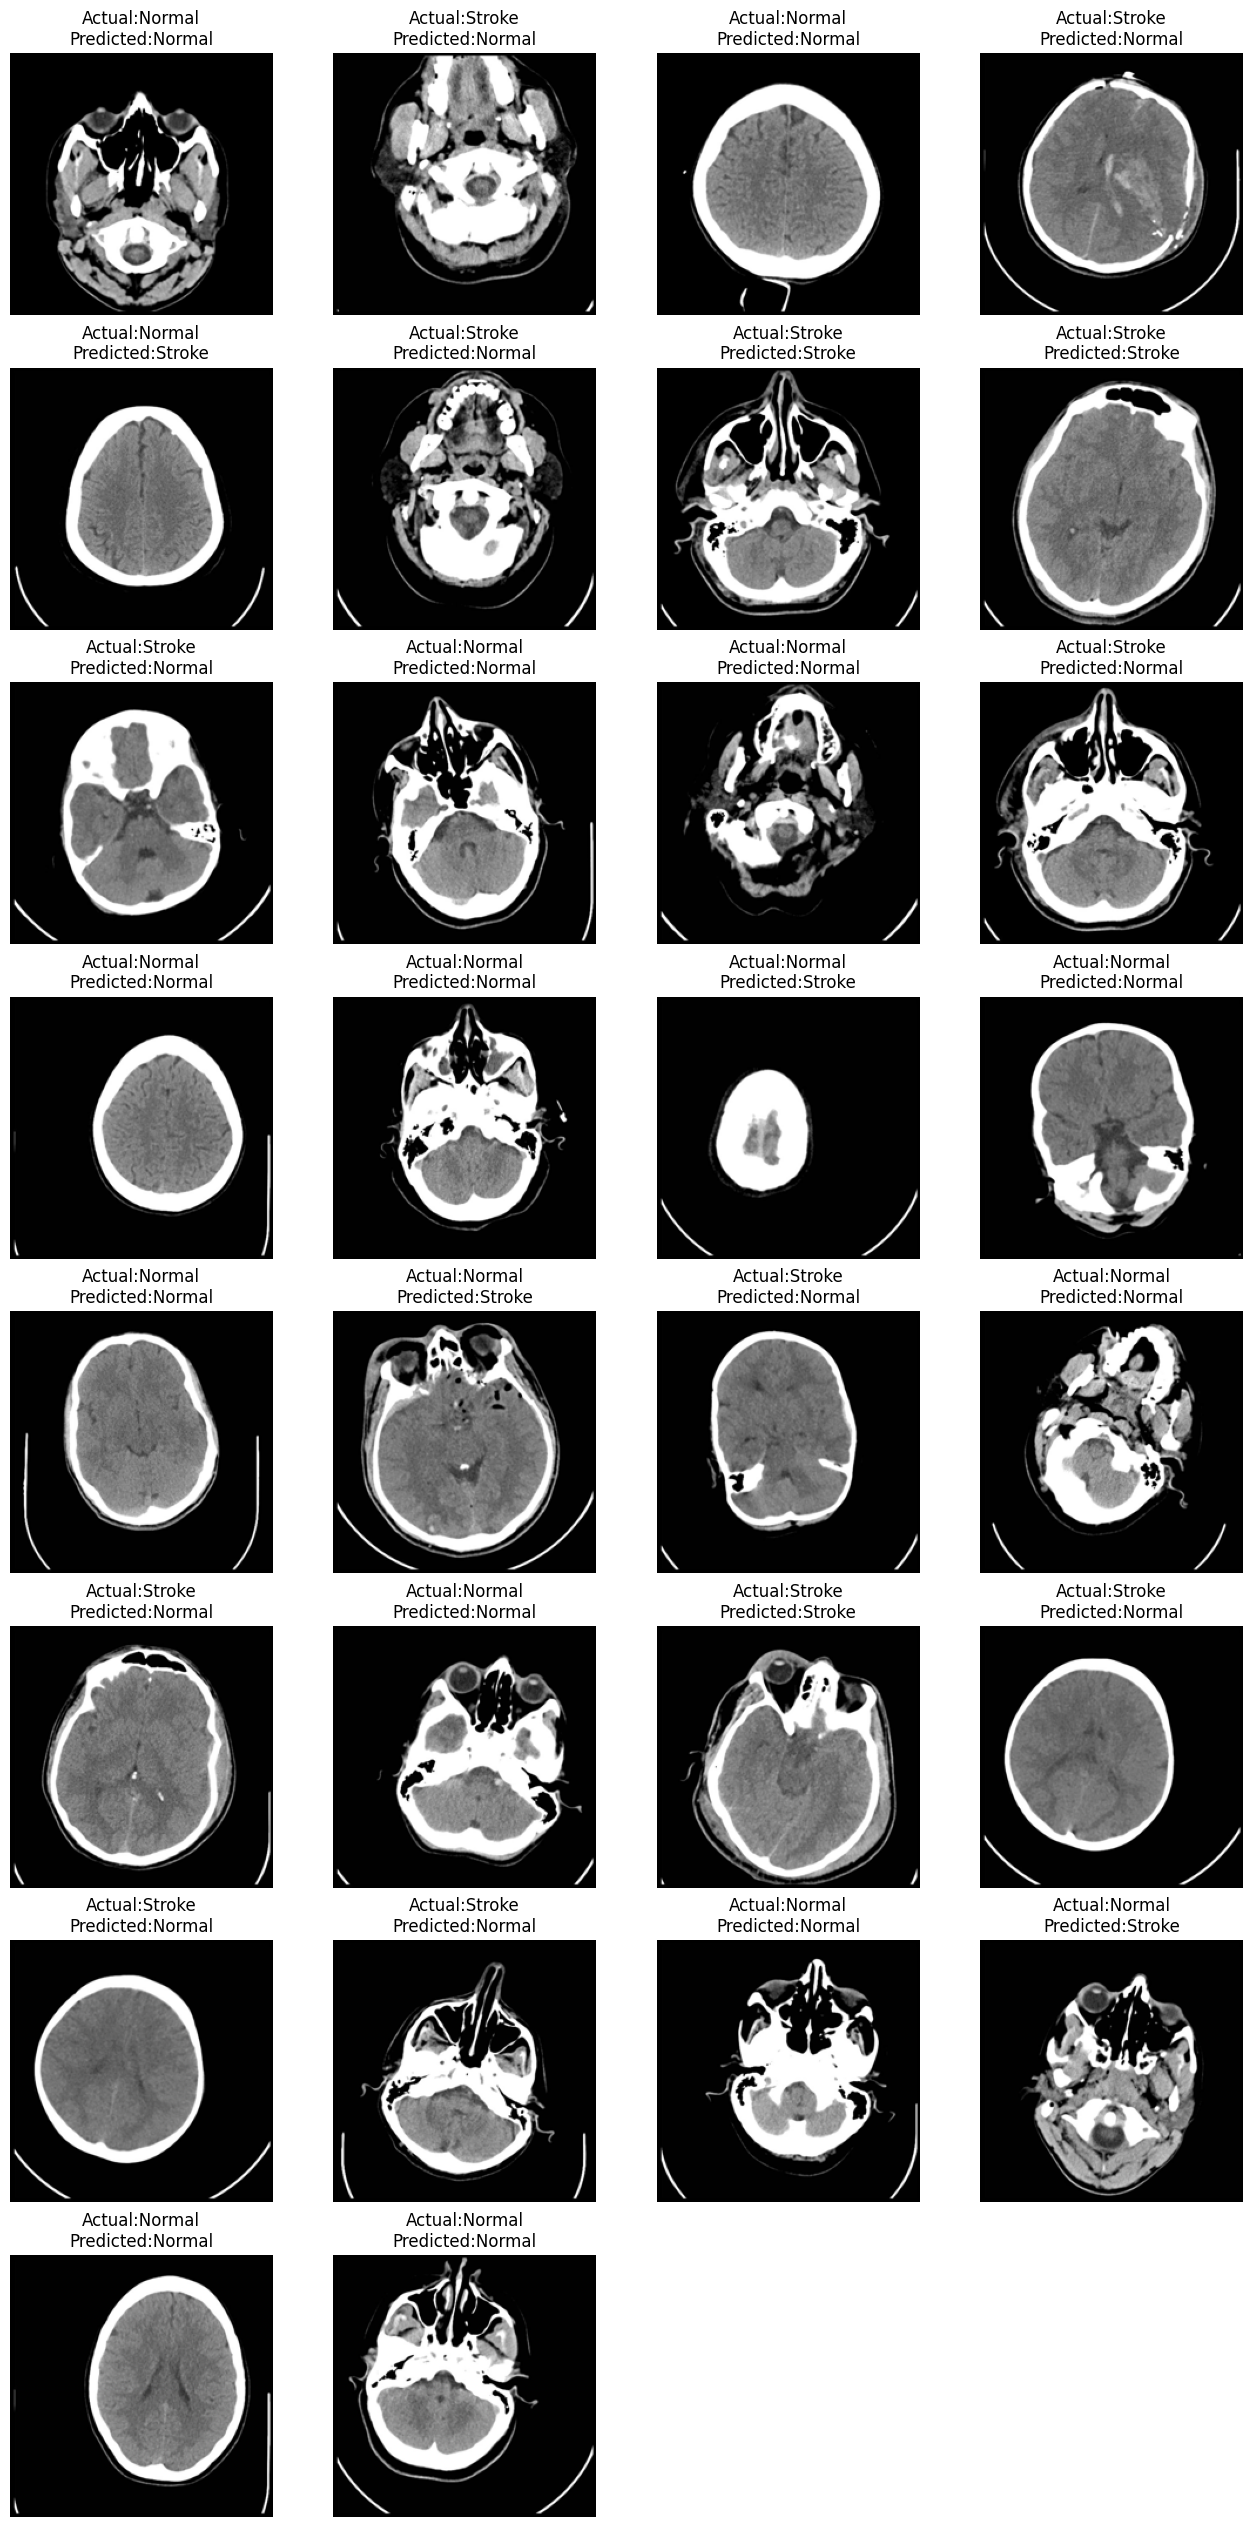

In [33]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

In [34]:
def predict_stroke(path):
    image = Image.open(path)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image1 = np.array(image)

    image_scaled = image1/255
    image_exp = np.expand_dims(image_scaled, axis=0)

    pred = ensemble_model.predict(image_exp)[0][0]
    plt.imshow(image1)
    plt.axis("off")
    if pred>=0.5:
        plt.title(f"Predicted Label : Stroke")
    else:
        plt.title(f"Predicted Label :Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


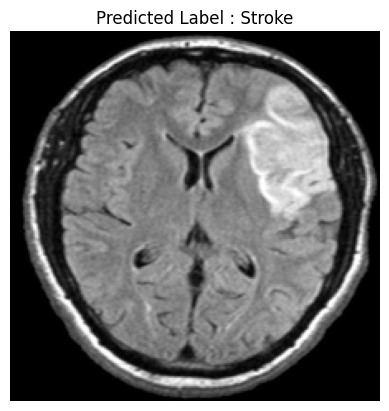

In [35]:
predict_stroke("C:/Users/vippa/OneDrive/Documents/AIML/AI Medical Diagnosis/Brain_stroke_dataset/1.JPG")